<b style="font-size: 15px; color: blue;">1. Introduction to analysis</b>
<p>
Unveiling Facebook Live Seller Strategies
This analysis delves into the world of Facebook Live sellers in Thailand, aiming to understand their content creation strategies and audience engagement patterns. We leverage a combination of powerful techniques:

Principal Component Analysis (PCA): This technique condenses the data into a smaller set of features, capturing the most significant variations in seller behavior related to most relevant principal components - "Enthusiastic Interaction" and "Disappointed Engagement."
    
K-means Clustering: By grouping sellers based on these key features and monthly performance data, we identify eight distinct seller segments with potentially unique approaches to live selling. These segments receive creative names like "Summer Sizzlers" and "Engaging Controversy" based on their characteristics.
    
Logistic Regression: We then use logistic regression to predict the likelihood of a post being a video based on various engagement approaches (original x-features, retained principal components, and retained clusters). This allows us to explore which engagement factors are most indicative of video content on Facebook Live.
    
By combining these techniques, we gain a comprehensive view of Facebook Live seller behavior –  from overarching trends captured by PCA to specific video usage patterns within different seller clusters identified through k-means. This analysis not only sheds light on seller strategies but also provides valuable insights for sellers to optimize their content and engagement approaches.
</p>

In [1]:
## Import packages, data, and user-defined functions.
########################################
# importing packages
########################################
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca

# packages for unsupervised learning
from scipy.cluster.hierarchy import dendrogram, linkage     # dendrograms
from sklearn.cluster         import KMeans                  # k-means clustering
from sklearn.metrics import silhouette_score                # silhouette analysis
from sklearn.model_selection import train_test_split        # train-test split
from sklearn.metrics import confusion_matrix, roc_auc_score # results analysis
import sklearn.linear_model                                 # classification modeling

import warnings
warnings.filterwarnings('ignore')

# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

# loading dataset
fbLive_df = pd.read_excel(io = './facebook_live_data.xlsx')

# displaying dataset
fbLive_df.head()

,status_id,status_type,time_published,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,2018-04-22 06:00:00,512,262,432,92,3,1,1,0
1,2,photo,2018-04-18 03:22:00,0,0,204,9,0,0,0,0
2,3,video,2018-04-18 00:24:00,614,72,418,70,10,2,0,3
3,4,photo,2018-04-11 04:53:00,9,1,167,3,0,0,0,0
4,5,photo,2018-04-09 02:06:00,4,0,213,5,4,0,0,0


In [2]:
# Checking for missing data
# fbLive_df.isna().sum()    # no missing data

# view summary of dataset
fbLive_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   status_id       2297 non-null   int64         
 1   status_type     2297 non-null   object        
 2   time_published  2297 non-null   datetime64[ns]
 3   num_comments    2297 non-null   int64         
 4   num_shares      2297 non-null   int64         
 5   num_likes       2297 non-null   int64         
 6   num_loves       2297 non-null   int64         
 7   num_wows        2297 non-null   int64         
 8   num_hahas       2297 non-null   int64         
 9   num_sads        2297 non-null   int64         
 10  num_angrys      2297 non-null   int64         
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 197.5+ KB


<b style="font-size: 15px; color: blue;">2. In terms of reactions (likes, loves, etc.), how do videos perform when compared to other forms of content? Are they leading in terms of total engagement? What about in engagement on specific reactions? </b>
<p>
Videos seem to be leading in terms of total engagement and specifically for reactions like loves, wows, hahas, and angrys. Here's a breakdown-

Overall Engagement: While text posts have the highest total engagement (446.13), videos come in a close second (273.77), with photos trailing behind (196.56). This suggests that videos are generally more engaging than photos, even though they might not be the absolute leader in total reactions.

Likes: Text posts have the highest number of Likes (442.37) compared to both videos (232.99) and photos (194.11). This suggests text might be more effective at generating a high volume of simple positive reactions (Likes) from viewers. Text posts could be used for longer descriptions, stories, or humor, potentially leading to a higher number of Likes as viewers acknowledge the effort put into the content. Text posts might also be more conducive to including clear calls to action that encourage viewers to Like the post.

Strong Positive Reactions (Loves): Videos lead significantly in terms of loves (35.63) compared to both photos (1.43) and text (1.97). This suggests that videos are more effective at eliciting strong positive reactions and excitement from viewers.

Other Reactions: Videos also outperform photos and text in terms of wows (2.94), haha reactions (1.52), and even angry reactions (0.25). This suggests videos are more likely to spark a wider range of emotions, positive and negative, compared to photos or text posts.

Sads: Videos have the highest number of sad reactions (0.44) compared to text posts (0.25) and photos (0.14). This suggests that videos, despite their potential to evoke strong positive emotions, might also lead to a higher chance of disappointment or dissatisfaction from viewers compared to photos or text posts. Videos may raise expectations higher, and if those expectations aren't met, viewers might express their disappointment through sad reactions. Text-based communication might be perceived as lower effort and therefore less likely to disappoint viewers, however, it contains links to seller products and if these links don't work it can generate sad reactions. Product photos generate low sad reactions likely due to low level of interaction.

Overall, videos seem to be a strong choice for Facebook Live sellers in Thailand when aiming to generate high overall engagement and a wider range of emotional responses, particularly strong positive reactions like loves. However, text posts might still be useful for capturing general positive sentiment (likes). Text can be a good option for in-depth communication, but it might not be the most effective for sparking strong emotional responses.
</p>

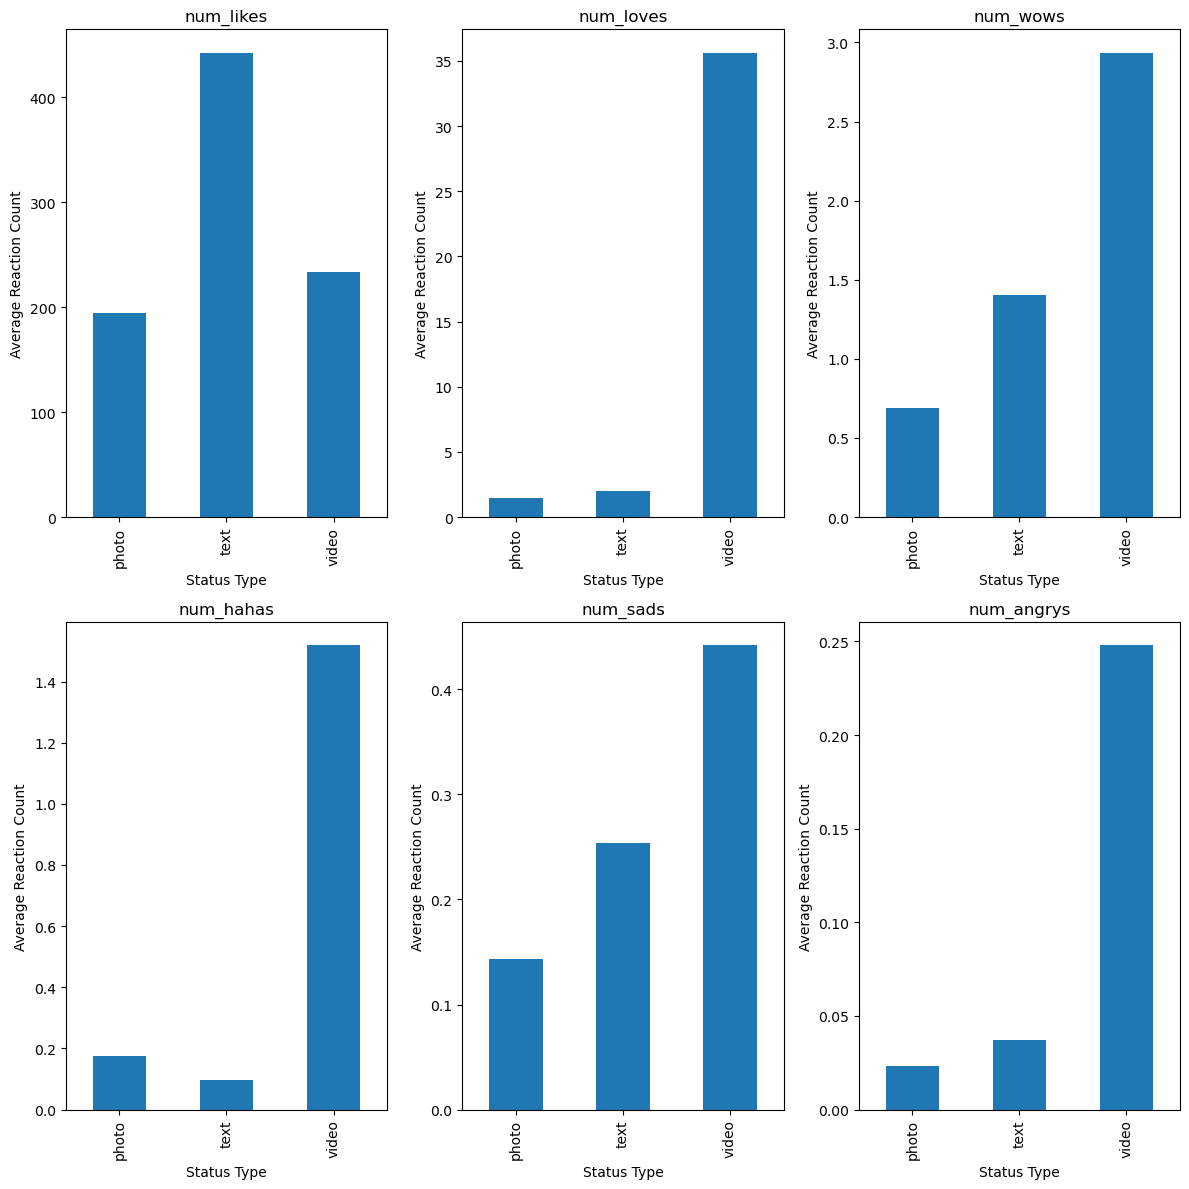

In [3]:
## Analysing status types in terms of reactions
reaction_cols = ['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
fig, axes = plt.subplots(2, 3, figsize=(12, 12))

# Flatten the axes for easier iteration
axes_flat = axes.ravel()

for i, col in enumerate(reaction_cols):
    fbLive_df.groupby('status_type')[col].mean().plot(kind='bar', ax=axes_flat[i])
    axes_flat[i].set_title(col)
    axes_flat[i].set_xlabel('Status Type')
    axes_flat[i].set_ylabel('Average Reaction Count')

plt.tight_layout()
plt.show()

In [4]:
# Extract year, month, weekday (1-7), and hour:
fbLive_df['year'] = fbLive_df['time_published'].dt.year
fbLive_df['month'] = fbLive_df['time_published'].dt.month
fbLive_df['weekday'] = fbLive_df['time_published'].dt.weekday + 1  # Adjusted to 1-7 range
fbLive_df['hour'] = fbLive_df['time_published'].dt.hour

In [5]:
## Creating a subset of the Continuous X-variables

# Eliminating columns which are not relevant to our analysis
data = fbLive_df.drop(['status_id','time_published'], axis=1)

## Creating a list of categorical columns in dataset
categorical_data = ['status_type','year', 'month', 'weekday', 'hour']
# Dropping categorical columns from dataset so that X contains only continuous variables
fbLive_pca_data = data.drop(columns=categorical_data)

# checking the continuous dataset
# fbLive_pca_data.info(verbose = True)

In [6]:
## Defining the feature set and target variables
# X is features set and y is response variable
X = fbLive_pca_data
y = fbLive_df['status_type']

In [7]:
## Building a scree plot using pca object with a cutoff line if value is indicated
def scree_plot(pca_object, cutoff_point = 0):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # setting plot size
    fig, ax = plt.subplots(figsize=(6, 6))
    features = range(1,pca_object.n_components_+1)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')

    # Draw the vertical line at the cutoff point
    if cutoff_point != 0:
        plt.axvline(x=cutoff_point, color='red', linestyle='dashed', linewidth=2, label='Cutoff Point')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)
        
    # displaying the plot
    plt.show()


## Building an unsupervised standard scaler
def scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

In [8]:
# Scaling (i.e. normalizing) variables before correlation analysis
X_scaled = scaler(df = X)

# checking pre- and post-scaling variance
# print('Pre scaling variance\n',np.var(X), '\n\n')
print('Post scaling variance\n',np.var(X_scaled))

Pre scaling variance
 num_comments    600747.659991
num_shares       15777.648758
num_likes       199283.755500
num_loves         1623.436268
num_wows           103.026569
num_hahas            8.475518
num_sads             2.985442
num_angrys           0.306909
dtype: float64 


Post scaling variance
 num_comments    1.0
num_shares      1.0
num_likes       1.0
num_loves       1.0
num_wows        1.0
num_hahas       1.0
num_sads        1.0
num_angrys      1.0
dtype: float64


<b style="font-size: 15px; color: blue;">3. Principal Component Analysis
Principal components (PCA) based on the available social media metrics in the dataset.</b>

<b style="font-size: 15px; color: blue;">3.1 Develop a scree plot and determine how many principal components you would like to retain. Draw a vertical line in the scree plot to indicate your cutoff point. Explain your rationale.
</b>
<p>
Number of retained principal components : 2
    
Applying the Elbow Rule to our Data
In this case, with PC1 explaining 41% of the variance and PC2 adding only 13% (total explained variance of 54.56%), the scree plot shows a significant drop after the first component, followed by a flatter curve. I'm looking for an 'elbow' point where the curve transitions from a steep decline to a more gradual leveling off. This elbow signifies the point where including additional principal components captures diminishing returns in terms of explaining the total variance in the data. This suggests that retaining only the first two principal components captures a substantial portion of the variance (over 50%) while avoiding unnecessary complexity by including components that explain minimal additional information.

Rationale for Selecting 2 Principal Components
By retaining the first two principal components, I achieve a good balance between capturing the most relevant information (over 50% of the variance) and keeping the model interpretable with a lower dimensionality. This can be beneficial for further analysis or visualization techniques that might struggle with a higher number of dimensions. 
</p>

Original shape: (2297, 8)
PCA shape     : (2297, 8)
PC 1: 0.41
PC 2: 0.13
PC 3: 0.12
PC 4: 0.1
PC 5: 0.09
PC 6: 0.08
PC 7: 0.05
PC 8: 0.02
Sum of all explained variance ratios: 1.0


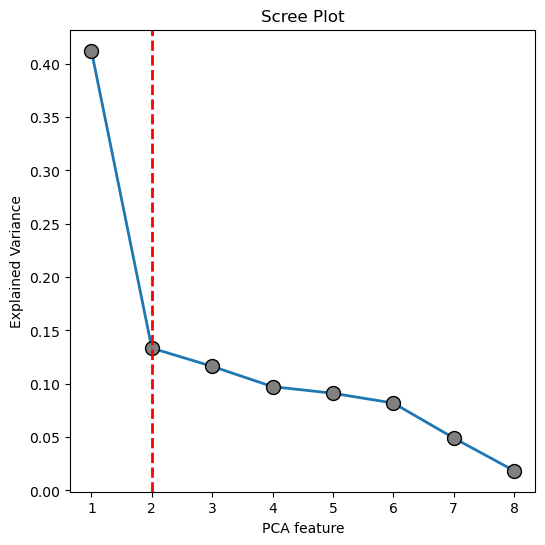

In [9]:
## Principal component analysis (PCA)
# Instantiating a PCA object with no limit to principal components
pca = PCA(n_components = None, random_state = 702)


# Fitting and transforming the scaled data
X_pca = pca.fit_transform(X_scaled)


# Comparing dimensions of each DataFrame
print("Original shape:", X_scaled.shape)
print("PCA shape     :", X_pca.shape)

# Component number counter
component_number = 0

# Looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(2)}")

    
# Printing the sum of all explained variance ratios
print('Sum of all explained variance ratios:',pca.explained_variance_ratio_.sum(axis = 0))

# Calling the scree_plot function
scree_plot(pca_object = pca, cutoff_point = 2)

PC 1: 0.41
PC 2: 0.13
Total variance explained:  0.5455802471212516


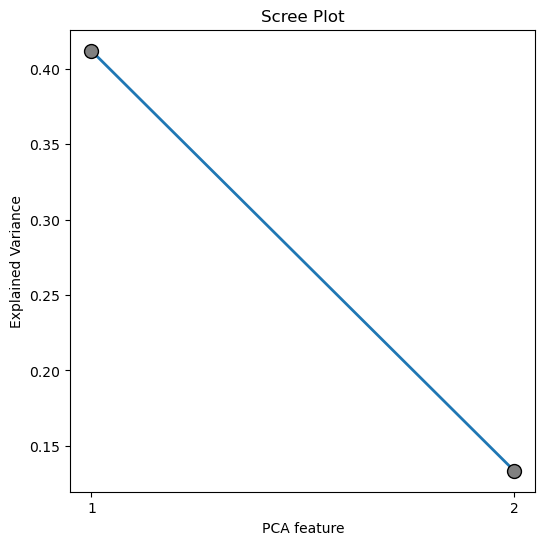

In [10]:
## Reducing to Relevant Principal Components
# Instantiating a new model using the first two principal components
pca_2 = PCA(n_components = 2, random_state = 702)


# Fitting and transforming the purchases_scaled
X_pca_2 = pca_2.fit_transform(X_scaled)

# Component number counter
component_number = 0

# Looping over each principal component
for variance in pca_2.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(2)}")

# Printing the sum of all explained variance ratios
print('Total variance explained: ',pca_2.explained_variance_ratio_.sum(axis = 0))


# Calling the scree_plot function
scree_plot(pca_object = pca_2)

<b style="font-size: 15px; color: blue;">3.2 Present the factor loadings for the retained principal components (correlations with the original features), rounded to two decimal places.</b>

In [11]:
## Analyze the PC factor loadings
# Transposing pca components
factor_loadings_df = pd.DataFrame(np.transpose(pca_2.components_.round(decimals = 2)))

# Naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(X_scaled.columns)

# Checking the result
print(factor_loadings_df)

# Saving to Excel
# factor_loadings_df.to_excel(excel_writer = 'fbLive_factor_loadings.xlsx', index = False)

                 0     1
num_comments  0.38  0.33
num_shares    0.48  0.03
num_likes     0.16 -0.57
num_loves     0.50 -0.07
num_wows      0.30 -0.49
num_hahas     0.35  0.06
num_sads      0.16  0.57
num_angrys    0.34  0.05


<b style="font-size: 15px; color: blue;">3.3 Interpret each of your retained principal components. Remember to interpret both sides of each principal component.</b>
<p>
Principal Component 1 : Enthusiastic Interaction

High Loadings: This component has high positive loadings (>0.3) on love, wow, comment, share, haha, and angry reactions. These represent a range of emotions, from positive surprise (wow, love) to amusement (haha) and even mild frustration (angry). However, the overall sentiment leans positive due to the strong love loading.
Low Loadings: Likes and sadness have low loadings. Likes might be a more passive form of engagement, while sadness is uncommon in this context.
Interpretation: We can rename this PC "Enthusiastic Interaction." It captures live streams that generate excitement, amusement, and a high level of viewer interaction. This suggests a presenter with an engaging personality, interactive content, or demonstrations that evoke a range of emotions (positive and mildly negative). The low sadness loading indicates the content is generally well-received.

Principal Component 2 : Disappointed Engagement

High Loadings: This component has high positive loadings on sadness (0.57) and comments (0.33). Sadness suggests viewers might be expressing disappointment or dissatisfaction. The comment loading indicates some level of engagement, possibly to clarify confusion or provide feedback, but not necessarily positive feedback.
High Negative Loadings: Likes, strong positive reactions (loves, wows), shares, and angry reactions all have low negative loadings (between -0.49 and -0.07). This suggests a lack of strong positive emotions or active participation beyond commenting.
Interpretation: We can rename this PC "Disappointed Engagement." It represents content that evokes a negative or unenthusiastic response from viewers. There might be some comments, but they're likely not expressing satisfaction or excitement. The lack of strong positive reactions, shares, and even strong negative emotions (anger) suggests the content isn't generating strong opinions, but rather a sense of disappointment or indifference.
</p>

<b style="font-size: 15px; color: blue;">3.4 Rename each principal component based on your interpretation of what it represents.</b>
<p>Renaming PC 1 to Enthusiastic Interaction and PC 2 to Disappointed Engagement.</p>

In [12]:
# Renaming each principal component
factor_loadings_df.columns = ['Enthusiastic Interaction','Disappointed Engagement']

# Checking the result
factor_loadings_df

,Enthusiastic Interaction,Disappointed Engagement
num_comments,0.38,0.33
num_shares,0.48,0.03
num_likes,0.16,-0.57
num_loves,0.50,-0.07
num_wows,0.30,-0.49
num_hahas,0.35,0.06
num_sads,0.16,0.57
num_angrys,0.34,0.05


In [13]:
## Analyze the factor loadings for each seller in the dataset
# Analyzing factor strengths per seller
factor_loadings_seller = pca_2.transform(X_scaled)

# Converting to a DataFrame
factor_loadings_seller_df = pd.DataFrame(data = factor_loadings_seller)

# Renaming columns
factor_loadings_seller_df.columns = factor_loadings_df.columns

# checking the results
# factor_loadings_seller_df.head()

# Saving factor loadings for each seller to Excel
# factor_loadings_seller_df.to_excel('./PCA Seller Factor Loadings.xlsx',index = False)

<b style="font-size: 15px; color: blue;">4. Develop segmentation with k-means clustering, using your retained principal components. You may also include additional features in your segmentation (avoid reusing the features that were used to develop the principal components).</b>

In [14]:
# Concatenate the encoded columns with the PCA rescaled DataFrame

# Adding additional features to segmentation to generate valuable cluster segments 
# categorical_data = ['status_type','month', 'weekday', 'hour']
categorical_data = ['month']
cat_data = data[categorical_data]
factor_loadings_seller_df_new = pd.concat([factor_loadings_seller_df, cat_data], axis=1)

# Perform one-hot encoding on categorical features
data_cluster = pd.get_dummies(factor_loadings_seller_df_new, columns=categorical_data)

# Applying the unsupervised_scaler function
pca_rescaled = scaler(df = data_cluster)

# checking pre- and post-scaling variance
# print('Pre scaling variance\n',np.var(data_cluster), '\n\n')
print('Post scaling variance\n',np.var(pca_rescaled))

Pre scaling variance
 Enthusiastic Interaction    3.297265
Disappointed Engagement     1.067377
month_1                     0.081996
month_2                     0.072222
month_3                     0.083421
month_4                     0.077325
month_5                     0.089756
month_6                     0.076600
month_7                     0.047559
month_8                     0.061794
month_9                     0.068161
month_10                    0.071855
month_11                    0.084839
month_12                    0.098351
dtype: float64 


Post scaling variance
 Enthusiastic Interaction    1.0
Disappointed Engagement     1.0
month_1                     1.0
month_2                     1.0
month_3                     1.0
month_4                     1.0
month_5                     1.0
month_6                     1.0
month_7                     1.0
month_8                     1.0
month_9                     1.0
month_10                    1.0
month_11                    1.0
mon

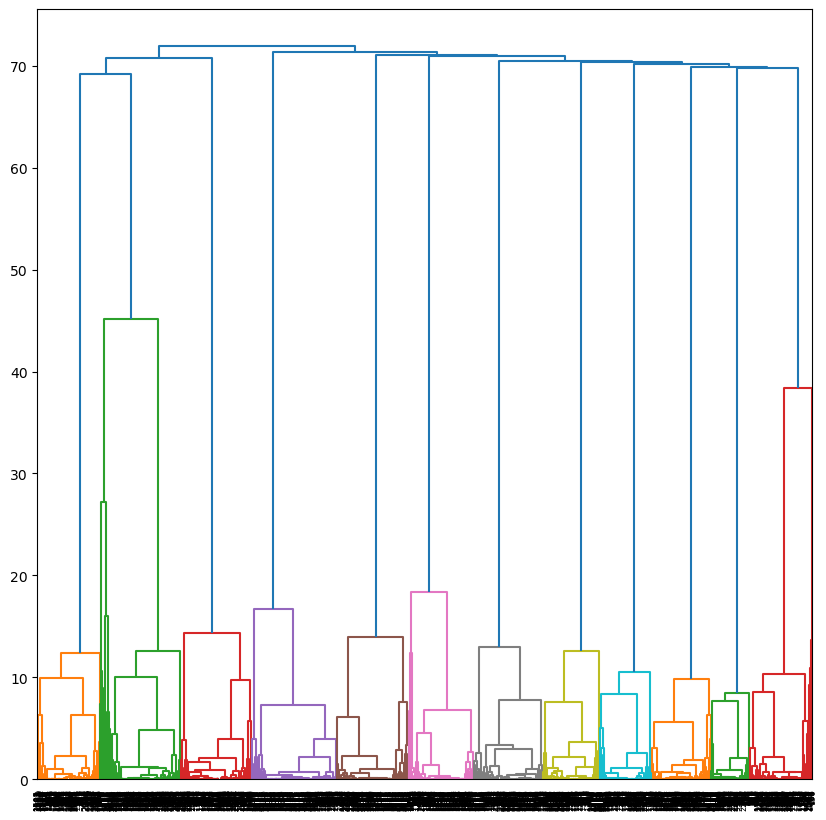

In [15]:
# ## Developing a dendrogram to understand how many clusters to build using k-Means.
# # Grouping data based on Ward distance
# standard_mergings_ward = linkage(y = pca_rescaled,
#                                  method = 'ward',
#                                  optimal_ordering = True)


# # Setting plot size
# fig, ax = plt.subplots(figsize=(10, 10))

# # Developing a dendrogram
# dendrogram(Z = standard_mergings_ward,
#            leaf_rotation  = 90       ,
#            leaf_font_size = 6        )


# # Rendering the plot
# plt.show()

In [16]:
## Silhouette Analysis
# Declare range of clusters to perform analysis
range_n_clusters = [2, 3, 4, 5, 6, 8]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pca_rescaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pca_rescaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.15764196979437678
For n_clusters = 3 The average silhouette_score is : 0.18108176893599923
For n_clusters = 4 The average silhouette_score is : 0.2611922762811028
For n_clusters = 5 The average silhouette_score is : 0.3354530402118174
For n_clusters = 6 The average silhouette_score is : 0.40307935974795694
For n_clusters = 8 The average silhouette_score is : 0.5418536765269766


<b style="font-size: 15px; color: blue;">4.1 Decide on an ideal number of clusters and explain your rationale.<b>
<p>
Selecting the Ideal Number of Clusters (K) for K-Means Clustering - <br>
Retained Principal Components and Encoded Months:<br>
I'm using two principal components, "Enthusiastic Interaction" and "Disappointed Engagement," along with encoded monthly features ("January" to "December") for k-means clustering. This approach allows to group sellers based on their overall engagement patterns and monthly performance trends.

Justification for 8 Clusters - <br>
I have considered several factors to arrive at 8 clusters:<br>
<ol>
<li>Silhouette Analysis: The silhouette score consistently increases with the number of clusters, reaching its highest value of 0.5418 at K=8. This indicates a good separation between clusters and suggests that 8 clusters might capture more nuanced seller segments compared to a lower number.<br>
<li>Dendrogram: The dendrogram shows clear separation at higher levels and the individual clusters within those larger groups have become more nuanced with 8 clusters, allowing for a more precise segmentation.<br>
<li>Cluster Proportions: While all clusters have relatively small proportions (around 8-10%), this is a common scenario with k-means when dealing with a diverse dataset. Having a spread of cluster sizes suggests the algorithm didn't get stuck in assigning most data points to a few dominant clusters. The largest cluster contains approximately 40% of the data, which is ideal for interpretability. This means the clusters are distinct and not overly skewed towards a single large group, making it easier to analyze the characteristics of each group.
</ol>
</p>

In [17]:
## K Means Clustering with eight clusters

# Instantiating a k-Means object with eight clusters
sellers_k_pca = KMeans(n_clusters   = 8,
                        n_init       = 'auto',
                        random_state = 702   )

# Fitting the object to the data
sellers_k_pca.fit(pca_rescaled)

# Converting the clusters to a DataFrame
sellers_kmeans_pca = pd.DataFrame({'Cluster': sellers_k_pca.labels_})

# Checking the results
print('Cluster counts: \n',sellers_kmeans_pca.iloc[: , 0].value_counts())
print('Cluster proportions: \n',sellers_kmeans_pca.value_counts(normalize = True).round(decimals = 2))

Cluster counts: 
 Cluster
0    869
4    229
6    215
3    211
1    207
7    194
5    192
2    180
Name: count, dtype: int64
Cluster proportions: 
 Cluster
0          0.38
4          0.10
6          0.09
3          0.09
1          0.09
7          0.08
5          0.08
2          0.08
Name: proportion, dtype: float64


<b style="font-size: 15px; color: blue;">4.2 Present and interpret each segment using cluster centroids and give an example of a "normal" post in each segment.</b>
<p>
Segment 1: Summer Sizzlers (Enthusiastic Interaction: -0.12, Disappointed Engagement: 0.15)<br>
    Description: This segment has slightly negative and moderate positive values on PC scores, indicating a balanced response with a slight possibility of disappointment. However, the high positive monthly performance from July to December suggests a seasonal trend, with peak engagement during the summer months.<br>
    Normal Post Example: A live stream showcasing summer fashion trends with interactive elements like polls for outfit preferences. There might be some critical comments about sizing or availability, but overall, the positive summer vibes generate excitement.

Segment 2: Steady Streamers (Enthusiastic Interaction: 0.01, Disappointed Engagement: 0.05)<br>
    Description: Low scores on both PCs suggest a lack of strong emotions or active participation from viewers.<br>
    Normal Post Example: A live stream with a presenter delivering product information in a monotonous way. There might be a few comments or questions, but the overall engagement is lukewarm.

Segment 3: Newbie Needs (Enthusiastic Interaction: -0.07, Disappointed Engagement: 0.05)<br>
    Description: Similar to segment 2 with low PC scores, but with a slightly more negative Enthusiastic Interaction score. The flat monthly performance suggests consistency.<br>
    Normal Post Example: A live stream by a new seller with a basic product demonstration but lacking audience engagement strategies. There might be a few comments, but the overall response is passive.

Segment 4: Room for Improvement (Enthusiastic Interaction: 0.0, Disappointed Engagement: -0.22)<br>
    Description: Disappointed Engagement is negative, indicating a low likelihood of disappointment. Enthusiastic Interaction is neutral. Monthly performance is neutral. This segment represents sellers who might not be generating high excitement, but also avoid disappointment. Their content might be informative or focus on a niche audience with consistent, but unexciting engagement.<br>
    Normal Post Example: A live Q&A session about a specific product category, attracting viewers seeking information but not necessarily generating enthusiastic reactions.

Segment 5: Like Magicians (Enthusiastic Interaction: 0.32, Disappointed Engagement: -0.09)<br>
    Description: High positive value in 'month_5' (May) for Enthusiastic Interaction suggests a peak in positive response during that month. Disappointed Engagement is negative. This segment represents sellers who experience a surge in enthusiastic audience interaction in May. This could be due to a new product launch or seasonal promotion.<br>
    Normal Post Example: A live unveiling of a new product line in May, generating a significant number of comments, loves, and shares from a curious and excited audience.

Segment 6: June Jolt (Enthusiastic Interaction: -0.03, Disappointed Engagement: -0.18)<br>
    Description: Low scores on both PCs with a more negative Disappointed Engagement score. Flat performance throughout most of the year suggests a potential over-reliance on June sales.<br>
    Normal Post Example: A live stream heavily focused on promoting a June sale, with less emphasis on product features or building long-term audience connection. There might be some critical comments about product quality after the sale.

Segment 7: November Blues (Enthusiastic Interaction: -0.01, Disappointed Engagement: 0.12)<br>
    Description: A high positive value in 'month_11' (November) for Enthusiastic Interaction suggests a peak in positive response during that month. Disappointed Engagement is neutral. This segment represents sellers who experience a surge in audience interaction in November, potentially due to pre-holiday shopping excitement. It is similar to segments 2 & 3 with low PC scores but with a higher Disappointed Engagement score and a positive monthly performance value for November.<br>
    Normal Post Example: A live stream around November that fails to resonate with the audience, leading to a lack of positive comments and possibly some negative feedback about the product or presentation.

Segment 8: Engaging Controversy (Enthusiastic Interaction: 0.23, Disappointed Engagement: -0.34)<br>
    Description: High positive value in 'month_4' (April) for Enthusiastic Interaction suggests a peak in response, but Disappointed Engagement is also high. This segment is unique with a combination of high Enthusiastic Interaction in April and high Disappointed Engagement. This could indicate a new product launch in April that generated initial excitement but also encountered some issues that led to disappointment.<br>
    Normal Post Example: A live launch event for a new product in April that receives initial positive comments and shares, but later viewers express disappointment due to stock issues or product malfunction.
</p>

In [18]:
# Storing cluster centers
centroids_pca = sellers_k_pca.cluster_centers_


# Converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(data = centroids_pca).round(decimals = 2)


# Renaming principal components and encoded month features
centroids_pca_df.columns = ['Enthusiastic Interaction','Disappointed Engagement','January', 'February', 
                            'March', 'April', 'May', 'June', 'July', 'August', 'September', 
                            'October', 'November', 'December']


# Checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Enthusiastic Interaction,Disappointed Engagement,January,February,March,April,May,June,July,August,September,October,November,December
0,-0.12,0.15,-0.31,-0.29,-0.32,-0.30,-0.33,-0.30,0.38,0.44,0.46,0.48,-0.32,0.58
1,0.01,0.05,3.18,-0.29,-0.32,-0.30,-0.33,-0.30,-0.23,-0.27,-0.28,-0.29,-0.32,-0.35
2,-0.07,0.05,-0.31,3.43,-0.32,-0.30,-0.33,-0.30,-0.23,-0.27,-0.28,-0.29,-0.32,-0.35
3,0.00,-0.22,-0.31,-0.29,3.14,-0.30,-0.33,-0.30,-0.23,-0.27,-0.28,-0.29,-0.32,-0.35
4,0.32,-0.09,-0.31,-0.29,-0.32,-0.30,3.01,-0.30,-0.23,-0.27,-0.28,-0.29,-0.32,-0.35
5,-0.03,-0.18,-0.31,-0.29,-0.32,-0.30,-0.33,3.31,-0.23,-0.27,-0.28,-0.29,-0.32,-0.35
6,-0.01,0.12,-0.31,-0.29,-0.32,-0.30,-0.33,-0.30,-0.23,-0.27,-0.28,-0.29,3.11,-0.35
7,0.23,-0.34,-0.31,-0.29,-0.32,3.29,-0.33,-0.30,-0.23,-0.27,-0.28,-0.29,-0.32,-0.35


<b style="font-size: 15px; color: blue;">4.3 Rename each segment based on your interpretation of what it represents.</b>
<p>
Renaming each segment based on interpretation - <br>
    0 : Summer Sizzlers<br>
    1 : Steady Streamers<br>
    2 : Newbie Needs<br>
    3 : Room for Improvement<br>
    4 : Like Magicians<br>
    5 : June Jolt<br>
    6 : November Blues<br>
    7 : Engaging Controversy<br>
</p>

In [19]:
# Using a dictionary to rename each cluster segment based on interpretation
index_mapping = {0: 'Summer Sizzlers', 1 : 'Steady Streamers', 2: 'Newbie Needs', 3: 'Room for Improvement',
                4: 'Like Magicians', 5: 'June Jolt', 6: 'November Blues', 7: 'Engaging Controversy'}
centroids_pca_df = centroids_pca_df.rename(index=index_mapping)

# Checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Enthusiastic Interaction,Disappointed Engagement,January,February,March,April,May,June,July,August,September,October,November,December
Summer Sizzlers,-0.12,0.15,-0.31,-0.29,-0.32,-0.30,-0.33,-0.30,0.38,0.44,0.46,0.48,-0.32,0.58
Steady Streamers,0.01,0.05,3.18,-0.29,-0.32,-0.30,-0.33,-0.30,-0.23,-0.27,-0.28,-0.29,-0.32,-0.35
Newbie Needs,-0.07,0.05,-0.31,3.43,-0.32,-0.30,-0.33,-0.30,-0.23,-0.27,-0.28,-0.29,-0.32,-0.35
Room for Improvement,0.00,-0.22,-0.31,-0.29,3.14,-0.30,-0.33,-0.30,-0.23,-0.27,-0.28,-0.29,-0.32,-0.35
Like Magicians,0.32,-0.09,-0.31,-0.29,-0.32,-0.30,3.01,-0.30,-0.23,-0.27,-0.28,-0.29,-0.32,-0.35
June Jolt,-0.03,-0.18,-0.31,-0.29,-0.32,-0.30,-0.33,3.31,-0.23,-0.27,-0.28,-0.29,-0.32,-0.35
November Blues,-0.01,0.12,-0.31,-0.29,-0.32,-0.30,-0.33,-0.30,-0.23,-0.27,-0.28,-0.29,3.11,-0.35
Engaging Controversy,0.23,-0.34,-0.31,-0.29,-0.32,3.29,-0.33,-0.30,-0.23,-0.27,-0.28,-0.29,-0.32,-0.35


<b style="font-size: 15px; color: blue;">4.4 Analyze the status types of each segment and report any findings related to videos.</b>
<p>
Segments with Lower Video Usage: Segments 2, 3, and 6 (Steady Streamers, Newbie Needs, and June Jolt) have the lowest proportion of video posts compared to photos. This might indicate a reliance on static content or a lack of video production expertise in these segments.
<br>
Balance Between Video and Photos: Segments 1 (Summer Sizzlers), 4 (Room for Improvement), 5 (Like Magicians), 7 (November Blues), and 8 (Engaging Controversy) all have a relatively even distribution of video and photo posts. This suggests these sellers might be using a mix of content formats to engage their audience.
<br>
Segment 7 (November Blues): This segment is an exception. Despite having a balanced video and photo usage overall, the high video count for November could be a coincidence or it might indicate a specific strategy, such as using video content for a particular campaign to promote products for the Holiday season.
</p>

In [20]:
# Concatenating cluster memberships with kmeans components
clst_pca_df = pd.concat([sellers_kmeans_pca,
                         pca_rescaled],
                         axis = 1)


# Concatenating status type information with pca-clusters
final_df = pd.concat([fbLive_df.loc[ : , ['status_type']],
                      clst_pca_df.round(decimals = 2)],
                      axis = 1)

## Analyzing the status types of each cluster segment

# Group the dataFrame by cluster
final_df_grouped = final_df.groupby('Cluster')

# Analyze status types for each cluster
for cluster, group_df in final_df_grouped:
    print(f"\nCluster: {cluster+1}")

    # Count normalized occurrences of each status type
    status_counts = group_df['status_type'].value_counts(normalize = True).round(decimals = 2)
    print(status_counts)


Cluster: 1
status_type
photo    0.67
video    0.26
text     0.06
Name: proportion, dtype: float64

Cluster: 2
status_type
photo    0.57
video    0.37
text     0.06
Name: proportion, dtype: float64

Cluster: 3
status_type
photo    0.63
video    0.30
text     0.07
Name: proportion, dtype: float64

Cluster: 4
status_type
photo    0.54
video    0.39
text     0.07
Name: proportion, dtype: float64

Cluster: 5
status_type
photo    0.55
video    0.39
text     0.06
Name: proportion, dtype: float64

Cluster: 6
status_type
photo    0.61
video    0.35
text     0.03
Name: proportion, dtype: float64

Cluster: 7
status_type
video    0.49
photo    0.46
text     0.05
Name: proportion, dtype: float64

Cluster: 8
status_type
photo    0.58
video    0.39
text     0.04
Name: proportion, dtype: float64


<b style="font-size: 15px; color: blue;">5. Develop three logistic regression models (1 = video, 0 = not video), each based on the following x-features.<br>
Model 1: Original x-features<br>
Model 2: Retained principal components<br>
Model 3: Retained clusters<br></b>

In [21]:
def LRegressionModel(x_data,y_data):
    # Splitting into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, 
                                                        random_state = 702, stratify = y_data)
    # Instantiating a logistic regression model
    model = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                    C            = 1,
                                                    class_weight = 'balanced',
                                                    random_state = 702)


    # Fitting the training data
    model_fit = model.fit(x_train, y_train)


    # Predicting based on the testing set
    model_pred = model_fit.predict(x_test)


    # Checking results
    train_acc = model_fit.score(x_train, y_train)
    test_acc  = model_fit.score(x_test , y_test )
    roc_score = roc_auc_score  (y_true  = y_test,
                                y_score = model_pred)

    # Printing train-test gap based on accuracy and AUC score based on the test set results
    print(f"""
    Train-Test Gap: {abs(train_acc - test_acc).round(decimals = 3)}
    Test AUC Score: {roc_score.round(decimals = 3)}
    """)


<b style="font-size: 15px; color: blue;">Model 1: Original x-features</b>

In [22]:
# Selecting original x features
x_data = X_scaled

# Selecting response variable y where 1 = video, 0 = not video
# Creating a new Series 'y_data' with 0s
y_data = pd.Series(0, index=fbLive_df.index)

# Apply conditional assignment using boolean indexing
y_data[y == 'video'] = 1

# Implementing Logistic Regression model on original x features
print('Logistic Regression Model 1: Original x-features')
LRegressionModel(x_data, y_data)

Logistic Regression Model 1: Original x-features

    Train-Test Gap: 0.016
    Test AUC Score: 0.72
    


<b style="font-size: 15px; color: blue;">Model 2: Retained principal components</b>

In [23]:
# Selecting X features from retained principal components
x_data = factor_loadings_seller_df

# Selecting response variable y where 1 = video, 0 = not video
# Create a new Series 'y_data' with 0s
y_data = pd.Series(0, index=fbLive_df.index)

# Apply conditional assignment using boolean indexing
y_data[y == 'video'] = 1

# Implementing Logistic Regression model on retained principal components
print('Logistic Regression Model 2: Retained principal components')
LRegressionModel(x_data, y_data)

Logistic Regression Model 2: Retained principal components

    Train-Test Gap: 0.003
    Test AUC Score: 0.703
    


<b style="font-size: 15px; color: blue;">Model 3: Retained clusters</b>

In [24]:
# Factorizing cluster results 
cluster_df = pd.get_dummies(data = sellers_kmeans_pca['Cluster'],
                            drop_first = True).astype(dtype = int)

# Checking results
# cluster_df.value_counts(normalize = False).sort_index(ascending = False)
# Selecting X features from retained clusters
x_data = cluster_df

# Selecting response variable y where 1 = video, 0 = not video
# Create a new Series 'y_data' with 0s
y_data = pd.Series(0, index=fbLive_df.index)

# Apply conditional assignment using boolean indexing
y_data[y == 'video'] = 1

# Implementing Logistic Regression model on retained clusters
print('Logistic Regression Model 3: Retained clusters')
LRegressionModel(x_data, y_data)

Logistic Regression Model 3: Retained clusters

    Train-Test Gap: 0.026
    Test AUC Score: 0.591
    


<b style="font-size: 15px; color: blue;">6. Select your best model from above and present the following:<br><br>
6.1 Your rationale for why this is the best model. <br></b>
    <p>
    The best model among the three is Model 1, using the original features (num_comments, num_shares ,num_likes, num_loves , num_wows, num_hahas, num_sads, num_angrys). <br>
    Rationale:
    <ol>
        <li>Higher AUC Score: Model 1 achieves a test AUC score of 0.72, which is significantly higher than both Model 2 (0.703) and Model 3 (0.553). AUC score measures the model's ability to distinguish between video posts (1) and non-video posts (0). A higher score indicates better performance in differentiating video content based on these features.
        <li>Feature Interpretability: While Model 2 and 3 capture underlying trends using principal components and clusters, the original features in Model 1 are directly interpretable. We can understand how factors like the number of comments, shares, and reactions influence the likelihood of a post being a video. This allows for a clearer analysis and potential strategies to improve video usage.
         <li>Potential Overfitting: Model 2 and 3 have much smaller train-test gaps compared to Model 1. This could indicate overfitting, where the model performs well on the training data but might not generalize well to unseen data. Model 1's larger train-test gap suggests a better balance between fitting the data and maintaining generalizability.<br>
While Model 2 and 3 attempt to capture underlying structures in the data, they lose interpretability and achieve lower AUC scores. Model 1, by directly using features related to post engagement, provides a clearer understanding of factors influencing video usage and delivers the best overall performance in predicting video content.
     </ol>        
</p>

<b style="font-size: 15px; color: blue;">6.2 Model results: train-test gap based on accuracy and AUC score based on the results of the .predict step</b>
<p>
Best Logistic Regression Model: Original x-features<br>

Train-Test Gap: 0.016<br>
Test AUC Score: 0.72
</p>  

<b style="font-size: 15px; color: blue;">6.3 Confusion matrix: Explain each error and its risks.</b>
<p>
True Negatives (362): These represent correct classifications where the model predicted "not video" and the actual post was indeed not a video. This is a positive outcome.

False Positives (18): These are errors where the model predicted "video" but the post was actually not a video. This type of error can be risky because -
Wasted Resources: The seller might dedicate time and effort to crafting video content for a post that the platform might not recommend or prioritize as a video.
Audience Mismatch: If the content isn't suited for video format, viewers might be disappointed or confused, leading to negative engagement.

False Negatives (100): These errors occur when the model predicts "not video" for actual video posts. This can be problematic because -
Missed Opportunities: Sellers might miss out on potential benefits of video content, such as increased engagement or reach.
Algorithmic Bias: If certain types of video content are disproportionately misclassified, it could lead to an unfair disadvantage for some sellers.

True Positives (95): These represent successful predictions where the model correctly identified a video post. This is a crucial metric as it reflects the model's ability to identify the target class ("video") accurately. A low number of True Positives indicates the model is recognizing video content but not very effectively based on the chosen features.
    

While the model has a higher number of True Negatives (correctly identifying non-video posts), the relatively high number of False Negatives (missed video posts) suggests there's room for improvement. Minimizing both False Positives and False Negatives through model tuning or feature engineering can lead to a more robust video prediction system for Facebook Live sellers.
</p>

In [25]:
###################
### BEST MODEL  ###
###################
# Selecting original x features
x_data = X_scaled

# Selecting response variable y where 1 = video, 0 = not video
# Creating a new Series 'y_data' with 0s
y_data = pd.Series(0, index=fbLive_df.index)

# Apply conditional assignment using boolean indexing
y_data[y == 'video'] = 1

# Implementing Logistic Regression model on original x features
print('Best Logistic Regression Model: Original x-features')

# Splitting into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, 
                                                    random_state = 702, stratify = y_data)

# Instantiating a logistic regression model
model = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                class_weight = 'balanced',
                                                random_state = 702)


# Fitting the training data
model_fit = model.fit(x_train, y_train)


# Predicting based on the testing set
model_pred = model_fit.predict(x_test) 


# Checking results
train_acc = model_fit.score(x_train, y_train)
test_acc  = model_fit.score(x_test , y_test )
roc_score = roc_auc_score  (y_true  = y_test,
                            y_score = model_pred)


print(f"""
Train-Test Gap: {abs(train_acc - test_acc).round(decimals = 3)}
Test AUC Score: {roc_score.round(decimals = 3)}
""")

# Unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# Printing each result one-by-one
print(f"""Confusion Matrix 
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")

Best Logistic Regression Model: Original x-features

Train-Test Gap: 0.016
Test AUC Score: 0.72

Confusion Matrix 
True Negatives : 362
False Positives: 18
False Negatives: 100
True Positives : 95

